# Classification IMB hr

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [5]:
#importd df
df = pd.read_csv('Train_HR_Employee_Attrition.csv')
#enable full view of pandas dataframes
pd.set_option('display.max_columns', None)

In [6]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,88,3,3,Research Director,3,Single,8446.0,13782,9,NaN,No,17,3.0,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,52,3,5,Manager,3,Divorced,4834.0,8213,1,NaN,Yes,14,3.0,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,36,3,2,Sales Executive,4,Divorced,4768.0,16130,1,Y,Yes,25,3.0,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,65,3,1,Research Scientist,2,Single,2799.0,17674,2,Y,No,14,3.0,2,NaN,0,12,1.0,3,3.0,7,0,7
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,75,3,1,Laboratory Technician,4,Single,7978.0,6319,1,NaN,No,12,3.0,3,80.0,0,2,NaN,3,10.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37.0,No,Travel_Rarely,1123,Research & Development,16,2,Medical,4,Female,96,4,1,Laboratory Technician,4,Divorced,2115.0,7324,1,Y,Yes,13,3.0,2,80.0,2,1,3.0,2,17.0,0,0,0
1172,33.0,Yes,Non-Travel,249,Sales,6,4,Life Sciences,2,Female,76,1,2,Sales Executive,3,Married,5147.0,20739,4,Y,Yes,18,3.0,2,80.0,0,12,2.0,2,11.0,7,7,7
1173,33.0,No,NaN,583,Sales,4,1,Marketing,3,Male,87,2,2,Sales Executive,1,Married,2500.0,18154,1,NaN,No,12,NaN,1,80.0,0,5,2.0,4,3.0,2,0,3
1174,45.0,No,Non-Travel,1174,Sales,3,4,Marketing,1,Male,99,3,2,Sales Executive,2,Single,4385.0,20763,3,NaN,Yes,16,3.0,4,80.0,0,15,2.0,3,10.0,4,0,1


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='Department', ylabel='count'>

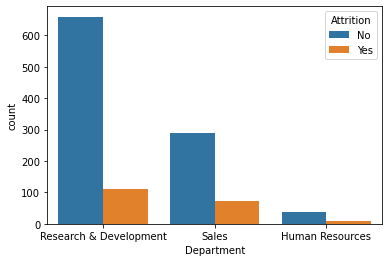

In [9]:
sns.countplot(x = 'Department', data = df, hue= 'Attrition')

In [23]:
x = pd.crosstab(df.Department, df.Attrition)
x.div(x.sum(1).astype(float), axis=0)

Attrition,No,Yes
Department,,
Human Resources,0.782609,0.217391
Research & Development,0.856957,0.143043
Sales,0.800554,0.199446


In [25]:
x = pd.crosstab(df.JobSatisfaction, df.Attrition)
x.div(x.sum(1).astype(float), axis=0)

Attrition,No,Yes
JobSatisfaction,,
1,0.765957,0.234043
2,0.842553,0.157447
3,0.823362,0.176638
4,0.892958,0.107042


In [24]:
x = pd.crosstab(df.JobRole, df.Attrition)
x.div(x.sum(1).astype(float), axis=0)

Attrition,No,Yes
JobRole,,
Healthcare Representative,0.952830,0.047170
Human Resources,0.756098,0.243902
Laboratory Technician,0.745283,0.254717
Manager,0.950617,0.049383
Manufacturing Director,0.930435,0.069565
Research Director,0.980392,0.019608
Research Scientist,0.833333,0.166667
Sales Executive,0.831418,0.168582
Sales Representative,0.623188,0.376812


### Preprocessing

In [282]:
#df.drop(columns = ['EducationField','JobRole','MaritalStatus'], inplace=True)

In [283]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [301]:
#encoding
d ={'Non-Travel':1, 'Travel_Rarely':2, 'Travel_Frequently':3}
df.loc[:,'BusinessTravel'] = df.loc[:,'BusinessTravel'].map(d)

In [302]:
df.Attrition.value_counts()

0    249
1     45
Name: Attrition, dtype: int64

In [303]:
#accuracy of always saying 0:
print((df.Attrition.value_counts()[0]/df.Attrition.value_counts().sum())*100,'%')

84.6938775510204 %


In [ ]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

### 1. Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score

In [11]:
#instanciate clf
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [12]:
#induction
clf = clf.fit(X_train, y_train)
#deduction
pred_train = clf.predict(X_train)
pred_validation= clf.predict(X_validation)

NameError: name 'X_train' is not defined

In [24]:
print(accuracy_score(pred_train,y_train))
print(accuracy_score(pred_validation,y_validation))

NameError: name 'pred_train' is not defined

#### Feature selection for classification

In [304]:
df_qual = df.loc[:,['BusinessTravel','EducationField','JobRole','MaritalStatus','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','Gender','OverTime']].copy()
df_quant = [k for k in list(df) if k not in list(df_qual) and k!='Attrition']
df_quant = df.loc[:,df_quant].copy()

In [170]:
from sklearn.feature_selection import SelectKBest

Part 1: quantitative (ANOVA)

In [171]:
from sklearn.feature_selection import f_classif

In [219]:
X = df_quant
y = df['Attrition']

In [173]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all').fit(X, y)

In [174]:
for i in list(df_quant):
    print(i, fs.scores_[list(df_quant).index(i)])

Age 0.8165409106379956
DistanceFromHome 5.9541540896552565
MonthlyIncome 0.0022799744297535736
NumCompaniesWorked 1.4990479075845466
PercentSalaryHike 1.2310598676912936
YearsAtCompany 0.2293848776982379


In [175]:
dic = {}
for i in list(df_quant):
    dic[i] = fs.scores_[list(df_quant).index(i)]
dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))

{'DistanceFromHome': 5.9541540896552565,
 'NumCompaniesWorked': 1.4990479075845466,
 'PercentSalaryHike': 1.2310598676912936,
 'Age': 0.8165409106379956,
 'YearsAtCompany': 0.2293848776982379,
 'MonthlyIncome': 0.0022799744297535736}

In [305]:
sub1 = ['DistanceFromHome','NumCompaniesWorked','PercentSalaryHike']

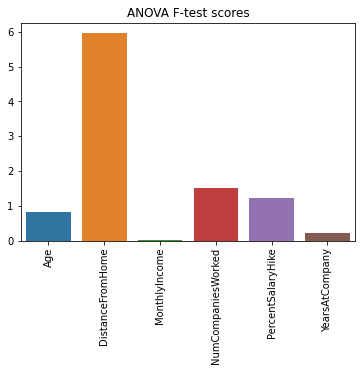

In [221]:
import seaborn as sns
g = sns.barplot(x = list(df_quant), y = fs.scores_)
g.set_xticklabels( labels= list(df_quant),  rotation=90)
g.set_title('ANOVA F-test scores')
plt.show()

Part 2: qualitative (chi_square)

In [178]:
from sklearn.feature_selection import chi2

In [257]:
#onehotencoding
df_qual = pd.get_dummies(df_qual)

In [223]:
len(list(df_qual))+len(list(df_quant))

38

In [224]:
X = df_qual
y = df['Attrition']

In [182]:
fc = SelectKBest(chi2, k='all').fit(X, y)

In [183]:
dic = {}
for i in list(df_qual):
    dic[i] = fc.scores_[list(df_qual).index(i)]
    #print(i,fc.scores_[list(df_qual).index(i)])
dict(sorted(dic.items(), key=lambda item: item[1],reverse=True)[:7])

{'OverTime': 49.51696673401648,
 'MaritalStatus_Single': 25.420055085015612,
 'JobRole_Sales Representative': 23.033050547896792,
 'StockOptionLevel': 22.636533063213356,
 'JobLevel': 19.74944847471192,
 'JobRole_Laboratory Technician': 12.97888863322596,
 'JobRole_Healthcare Representative': 10.458151173492865}

In [288]:
sub2 = list(dict(sorted(dic.items(), key=lambda item: item[1],reverse=True)[:7]).keys())
sub2

['OverTime',
 'MaritalStatus_Single',
 'JobRole_Sales Representative',
 'StockOptionLevel',
 'JobLevel',
 'JobRole_Laboratory Technician',
 'JobRole_Healthcare Representative']

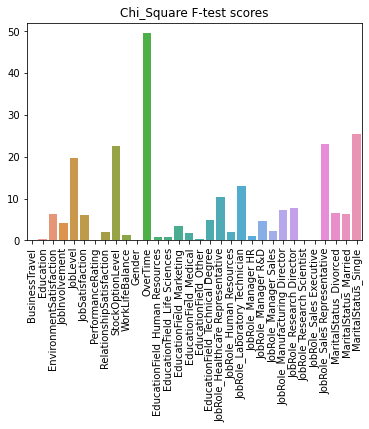

In [226]:
g = sns.barplot(x = list(df_qual), y = fc.scores_)
g.set_xticklabels(labels= list(df_qual),  rotation=90)
g.set_title('Chi_Square F-test scores')
plt.show()

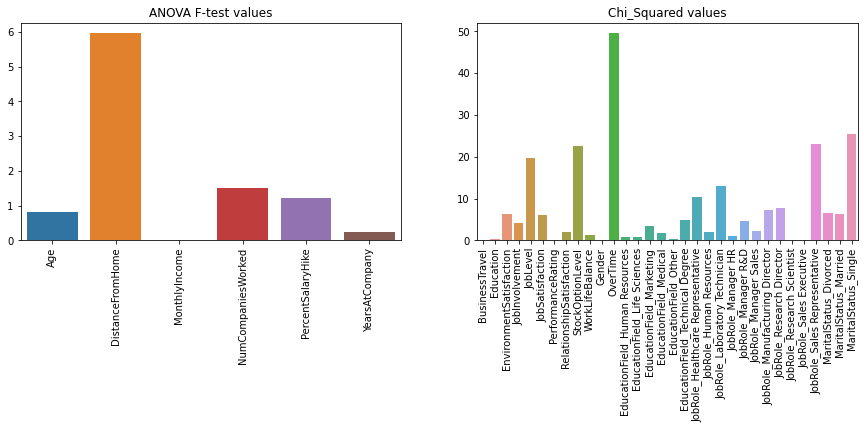

In [227]:
fig, ax = plt.subplots(1,2, figsize =(15,4))
plt.sca(ax[0])
g = sns.barplot(x = list(df_quant), y = fs.scores_)
g.set_xticklabels( labels= list(df_quant),  rotation=90)
g.set_title('ANOVA F-test values')
plt.sca(ax[1])
g = sns.barplot(x = list(df_qual), y = fc.scores_)
g.set_xticklabels(labels= list(df_qual),  rotation=90)
g.set_title('Chi_Squared values')
plt.show()

#### Hyper-parameter tuning

In [306]:
dfc = pd.concat([df_quant, df_qual, df['Attrition']], axis=1)
dfc

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany,BusinessTravel,EducationField,JobRole,MaritalStatus,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Gender,OverTime,Attrition
0,27.0,2,4298.0,6,14,2.0,3,Medical,Sales Executive,Divorced,2,1,1,2,4,3.0,4,2,2,1,1,1
1,30.0,3,5304.0,2,13,8.0,2,Marketing,Sales Executive,Married,4,1,3,3,3,4.0,1,3,3,1,0,1
2,56.0,1,6306.0,2,11,13.0,1,Technical Degree,Manufacturing Director,Divorced,4,4,3,2,4,4.0,3,1,2,1,0,0
3,41.0,3,6430.0,0,17,3.0,3,Human Resources,Human Resources,Married,5,4,4,1,1,3.0,3,0,3,1,0,1
4,42.0,1,2766.0,3,22,5.0,1,Life Sciences,Research Scientist,Married,3,4,3,1,4,4.0,1,1,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,38.0,1,8740.0,1,13,8.0,2,Marketing,Sales Representative,Married,3,4,3,1,4,3.0,1,0,3,1,0,0
290,44.0,1,6465.0,5,17,4.0,2,Life Sciences,Sales Executive,Married,2,3,3,2,1,NaN,2,1,3,1,0,0
291,30.0,4,2476.0,2,20,1.0,2,Technical Degree,Manufacturing Director,Single,1,4,3,2,4,3.0,4,0,2,1,0,0
292,36.0,4,2088.0,1,14,8.0,3,Other,Research Scientist,Married,2,2,2,1,3,3.0,2,0,2,1,1,0


In [229]:
####split1
attributes = [col for col in dfc.columns if col != 'Attrition']
X = dfc[attributes].values
y = dfc['Attrition']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [45]:
'''param_range = [2] + list(np.arange(2, 50,10))
param = 'min_samples_split'
train_scores, test_scores = validation_curve(
                                DecisionTreeClassifier(),
                                X , y , 
                                param_name = param, 
                                param_range = param_range, cv = 3)'''

"param_range = [2] + list(np.arange(2, 50,10))\nparam = 'min_samples_split'\ntrain_scores, test_scores = validation_curve(\n                                DecisionTreeClassifier(),\n                                X , y , \n                                param_name = param, \n                                param_range = param_range, cv = 3)"

In [46]:
'''train_means = np.mean(train_scores,axis=1)
test_means = np.mean(test_scores,axis=1)

plt.plot(param_range, train_means, label="Training score", color="orange")
plt.plot(param_range, test_means, label="Cross-validation score", color='xkcd:lightish blue')
plt.title("Validation Curve With Classification Tree")
plt.xlabel(param)
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()'''

'train_means = np.mean(train_scores,axis=1)\ntest_means = np.mean(test_scores,axis=1)\n\nplt.plot(param_range, train_means, label="Training score", color="orange")\nplt.plot(param_range, test_means, label="Cross-validation score", color=\'xkcd:lightish blue\')\nplt.title("Validation Curve With Classification Tree")\nplt.xlabel(param)\nplt.ylabel("Accuracy Score")\nplt.legend(loc="best")\nplt.show()'

In [47]:
def plot_validation_curve(classifier, parameter, param_range):
    train_scores, test_scores = validation_curve(
                                classifier,
                                X , y , 
                                param_name = parameter, 
                                param_range = param_range, cv = 3)
    train_means = np.mean(train_scores,axis=1)
    test_means = np.mean(test_scores,axis=1)
    plt.plot(param_range, train_means, label="Training score", color="orange")
    plt.plot(param_range, test_means, label="Cross-validation score", color='xkcd:lightish blue')
    plt.title("Validation Curve With Classification Tree")
    plt.xlabel(parameter)
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.show()

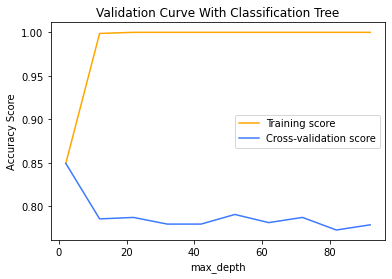

In [48]:
plot_validation_curve(DecisionTreeClassifier(),'max_depth',([2] + list(np.arange(2, 100,10))))

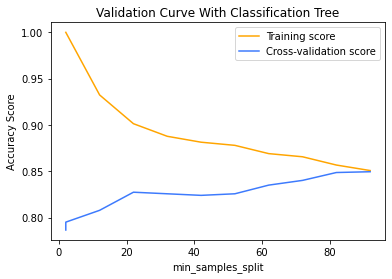

In [49]:
plot_validation_curve(DecisionTreeClassifier(),'min_samples_split',([2] + list(np.arange(2, 100,10))))

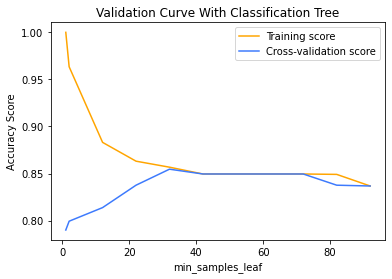

In [50]:
plot_validation_curve(DecisionTreeClassifier(),'min_samples_leaf',([1] + list(np.arange(2, 100,10))))

In [ ]:
clf = DecisionTreeClassifier(criterion = 'gini',max_depth=None,min_samples_split=2,min_samples_leaf=1)

In [51]:
#parameter tuning
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
shared_dic={}
param_list_0 = {'max_depth': [None, 5, 10],
                  'min_samples_split': [round((len(X)*0.01)), 2*round((len(X)*0.01))],
                  'min_samples_leaf': [round((len(X)*0.01)), 2*round((len(X)*0.01))]}
grid_search = GridSearchCV(clf, param_grid=param_list_0, n_jobs=3, pre_dispatch='3*n_jobs')
grid_search.fit(X, y)
results = grid_search.cv_results_
candidates = np.flatnonzero(results['rank_test_score'] ==1)
shared_dic[i] = results['mean_test_score'][candidates[0]].round(3)
shared_dic

In [ ]:
results['mean_test_score'][candidates[0]].round(3)

In [ ]:
%%time
#GridSearchCV
param_list = {'max_depth': [None] + list(np.arange(2, 10)),
              'min_samples_split': [2]+list(np.arange(5, 30, 5)),
              'min_samples_leaf': [1]+list(np.arange(5, 30, 5)),}
grid_search = GridSearchCV(clf, param_grid=param_list, n_jobs=2, pre_dispatch='2*n_jobs')
grid_search.fit(X, y)
grid_search.best_estimator_

In [ ]:
round((len(X)*0.01))

In [59]:
%%time
#GridSearchCV
param_list_0 = {'max_depth': [None, 5, 10],
              'min_samples_split': [round((len(X)*0.01)), 2*round((len(X)*0.01))],
              'min_samples_leaf': [round((len(X)*0.01)), 2*round((len(X)*0.01))]}
grid_search = GridSearchCV(clf, param_grid=param_list_0, n_jobs=3, pre_dispatch='3*n_jobs')
grid_search.fit(X, y)
grid_search.best_estimator_

CPU times: user 470 ms, sys: 150 ms, total: 620 ms
Wall time: 7.83 s


DecisionTreeClassifier(max_depth=5, min_samples_leaf=12, min_samples_split=12)

In [62]:
report(grid_search.cv_results_, n_top=1)


Model with rank: 1
Mean validation score: 0.851 (std: 0.013)
Parameters: {'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 12}

Model with rank: 1
Mean validation score: 0.851 (std: 0.013)
Parameters: {'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 24}



In [ ]:
#RandomizedSearchCV
param_list = {'max_depth': [None] + list(np.arange(10, 20)),
              'min_samples_split': [2]+list(np.arange(5, 50, 5)),
              'min_samples_leaf': [1]+list(np.arange(5, 50, 5)),
             }
random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100)
rs = random_search.fit(X, y)
random_search.best_estimator_

In [ ]:
report(random_search.cv_results_, n_top=2)

In [230]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=1)
clf = clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)

In [ ]:
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

After feature selection

In [259]:
#new df
dfc1 =  dfc.loc[:,sub1 + sub2+['Attrition']]
list(dfc1)

['DistanceFromHome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'OverTime',
 'MaritalStatus_Single',
 'JobRole_Sales Representative',
 'StockOptionLevel',
 'JobLevel',
 'JobRole_Laboratory Technician',
 'JobRole_Healthcare Representative',
 'Attrition']

In [232]:
####new split
attributes = [col for col in dfc1.columns if col != 'Attrition']
X = dfc1[attributes].values
y = dfc1['Attrition']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [71]:

b = BEAST.main(classifier = DecisionTreeClassifier(), data = dfc1, t_var = 'Attrition', column_range=(1,9))

100%|██████████| 2/2 [00:00<00:00, 68.61it/s]


In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print('')

In [72]:
param_list = {
              'max_depth': [None] + list(np.arange(4, 20,4)),
              'min_samples_split': [2]+list(np.arange(2, 100,10)),
              'min_samples_leaf': [1]+list(np.arange(1, 100, 10)),
             }

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=30)
random_search.fit(X_train, y_train)

clf = random_search.best_estimator_
report(rando

In [43]:
b

{('NumCompaniesWorked',
  'OverTime',
  'MaritalStatus_Single',
  'JobLevel',
  'JobRole_Laboratory Technician'): [0.8631,
  'DecisionTreeClassifier(min_samples_leaf=13, min_samples_split=3)']}

In [247]:
df_best = dfc1[['Attrition','NumCompaniesWorked',
  'OverTime',
  'MaritalStatus_Single',
  'JobLevel',
  'JobRole_Laboratory Technician']].copy()
attributes = [col for col in df_best.columns if col != 'Attrition']
X = df_best[attributes].values
y = df_best['Attrition']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [248]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=3, min_samples_leaf=13)

In [58]:
#GridSearchCV
param_list = {'max_depth': [None] + list(np.arange(2, 10)),
              'min_samples_split': [2]+list(np.arange(3, 20, 1)),
              'min_samples_leaf': [1]+list(np.arange(3, 20, 1)),}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_list, n_jobs=2, pre_dispatch='2*n_jobs')
grid_search.fit(X, y)
grid_search.best_estimator_

DecisionTreeClassifier(min_samples_leaf=13, min_samples_split=3)

In [249]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=3, min_samples_leaf=13)
clf = clf.fit(X_train, y_train)

In [250]:
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)

In [251]:
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))

train acc. :  0.8663426488456865
test acc. :  0.8526912181303116


In [252]:
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8631 (+/- 0.05)
F1-score: 0.6546 (+/- 0.14)


In [199]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, round(imp,2))

NumCompaniesWorked 0.13
OverTime 0.38
MaritalStatus_Single 0.15
JobLevel 0.29
JobRole_Laboratory Technician 0.05


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
X

In [ ]:
r = RFE(SVR(kernel="linear"), 5)
r = r.fit(X,y)
r.support_

In [ ]:
dic = {}
for col, imp in zip(attributes, clf.feature_importances_):
    dic[col]= imp

In [ ]:
dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))


In [78]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [80]:
attributes

['NumCompaniesWorked',
 'OverTime',
 'MaritalStatus_Single',
 'JobLevel',
 'JobRole_Laboratory Technician']

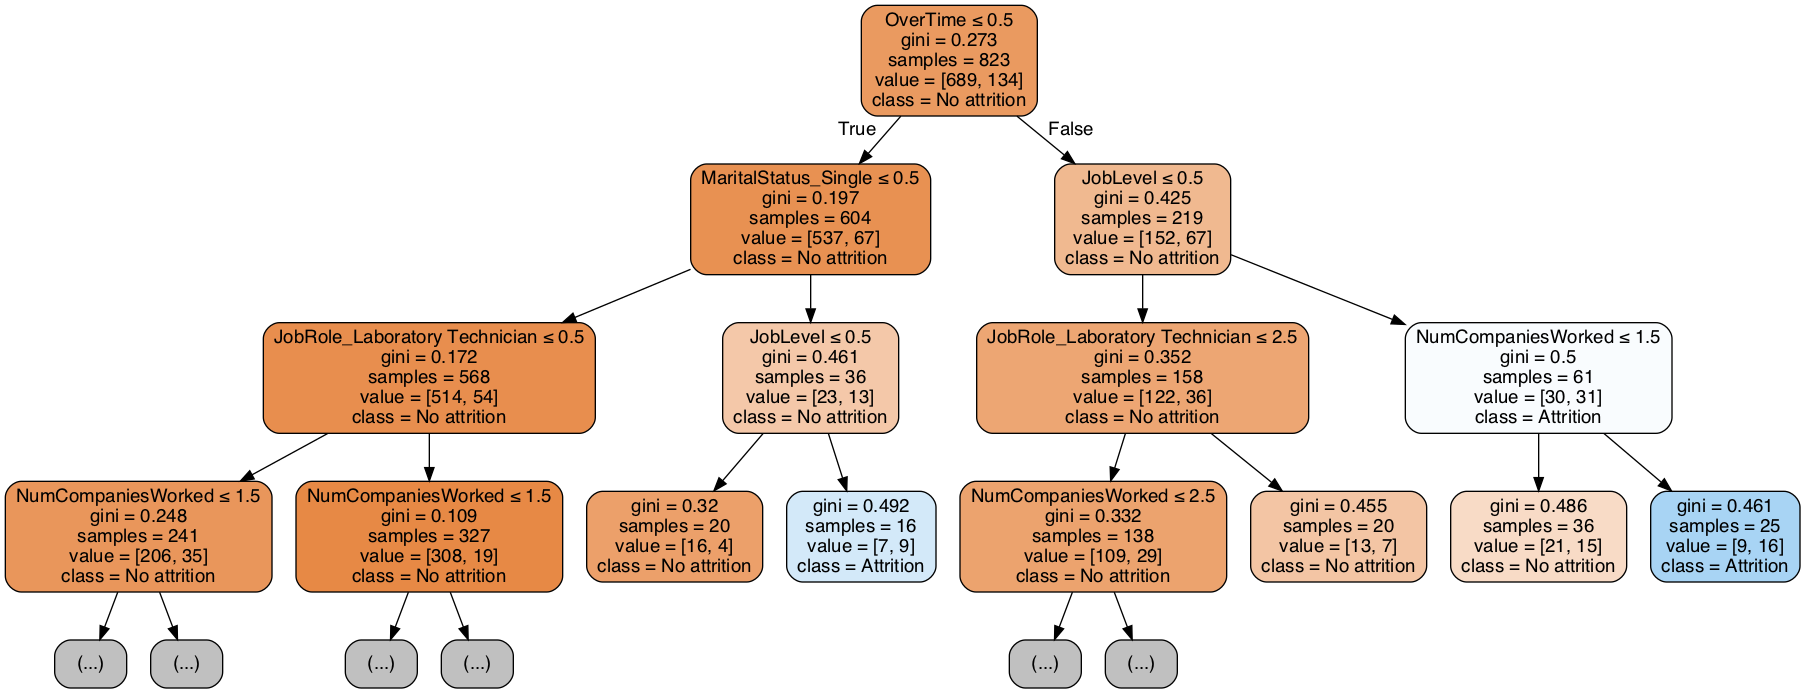

In [89]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'No attrition' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [200]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr))
print()

print('Test Accuracy %s' % accuracy_score(y_validation, y_pred))
print('Test F1-score %s' % f1_score(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
confusion_matrix(y_validation, y_pred)

Train Accuracy 0.8663426488456865
Train F1-score 0.4387755102040816

Test Accuracy 0.8526912181303116
Test F1-score 0.3658536585365854
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       295
           1       0.62      0.26      0.37        58

    accuracy                           0.85       353
   macro avg       0.75      0.61      0.64       353
weighted avg       0.83      0.85      0.83       353



array([[286,   9],
       [ 43,  15]])

In [201]:
fpr, tpr, _ = roc_curve(y_validation, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_validation, y_pred, average=None)

0.6140561075394506


In [129]:
fpr1, tpr1, _ = roc_curve(y_validation, y_pred)
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)

roc_auc1 = roc_auc_score(y_validation, y_pred, average=None)

0.615604909409702


In [117]:
roc_auc

0.6140561075394506

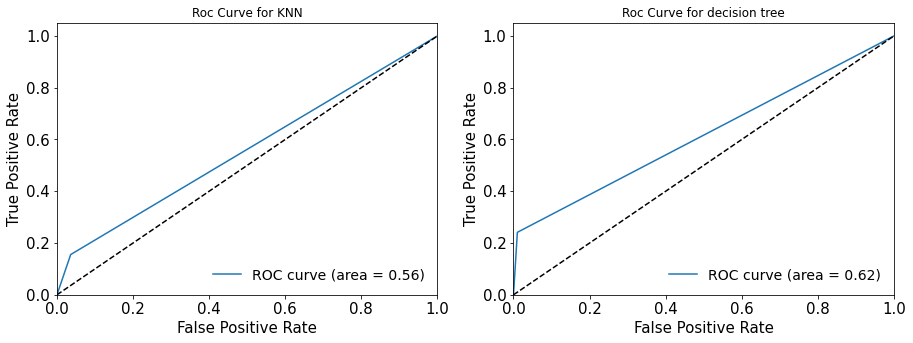

In [312]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))

plt.sca(ax[0])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Roc Curve for KNN')
plt.legend(loc="lower right", fontsize=14, frameon=False)

plt.sca(ax[1])
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % (roc_auc1))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Roc Curve for decision tree')
plt.legend(loc="lower right", fontsize=14, frameon=False)

plt.show()

In [138]:
from sklearn.model_selection import cross_val_score

In [88]:
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8623 (+/- 0.05)
F1-score: 0.6554 (+/- 0.14)


## KNN

In [160]:
df

,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Gender,OverTime,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager HR,JobRole_Manager R&D,JobRole_Manager Sales,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,2,4,2,3,3,3,3.0,3,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,1,2,3,5,3,3.0,3,1,3,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,3,3,3,2,4,3.0,3,1,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,2,4,2,3,1,2,3.0,2,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2,2,3,3,1,4,3.0,3,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,2,2,4,4,1,4,3.0,2,2,2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1172,1,4,2,1,2,3,3.0,2,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1173,2,1,3,2,2,1,3.0,1,0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1174,1,4,1,3,2,2,3.0,4,0,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [290]:
dfnn = df[['Attrition','EnvironmentSatisfaction', 'JobLevel', 'OverTime', 'StockOptionLevel', 'WorkLifeBalance']].copy()
attributes = [col for col in dfnn.columns if col != 'Attrition']
X = dfnn[attributes].values
y = dfnn['Attrition']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [124]:
dfnn

,Attrition,EnvironmentSatisfaction,JobLevel,OverTime,StockOptionLevel,WorkLifeBalance
0,0,2,3,0,0,2
1,0,2,5,1,1,3
2,0,3,2,1,1,3
3,0,2,1,0,0,3
4,0,3,1,0,0,3
...,...,...,...,...,...,...
1171,0,4,1,1,2,2
1172,1,2,2,1,0,2
1173,0,3,2,0,0,4
1174,0,1,2,1,0,3


In [291]:
clf = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8478 (+/- 0.04)
F1-score: 0.6467 (+/- 0.09)


In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
[‘EnvironmentSatisfaction', 'JobLevel', 'OverTime', 'StockOptionLevel', 'WorkLifeBalance']

In [298]:
clf = KNeighborsClassifier(n_neighbors = 4, weights='uniform', n_jobs = 2)
clf.fit(X, y)

KNeighborsClassifier(n_jobs=2, n_neighbors=4)

In [293]:
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)

In [294]:
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))

train acc. :  0.8797083839611178
test acc. :  0.8668555240793201


In [299]:
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8529 (+/- 0.03)


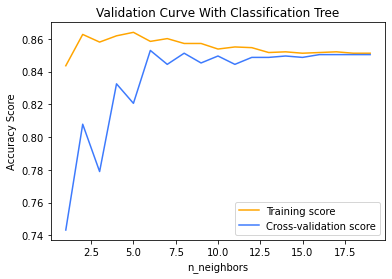

In [160]:
plot_validation_curve(KNeighborsClassifier(),'n_neighbors',(list(np.arange(1, 20,1))))

In [161]:
df_quant

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany
0,52.0,2,8446.0,9,17,8.0
1,36.0,1,4834.0,1,14,1.0
2,34.3,3,4768.0,1,25,1.0
3,33.0,1,2799.0,2,14,3.0
4,41.1,2,7978.0,1,12,10.0
...,...,...,...,...,...,...
1171,37.0,3,2115.0,1,13,17.0
1172,33.0,1,5147.0,4,18,11.0
1173,33.0,1,2500.0,1,12,3.0
1174,45.0,1,4385.0,3,16,10.0


In [310]:
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y, y_pred, average=None)

0.5597054886211512


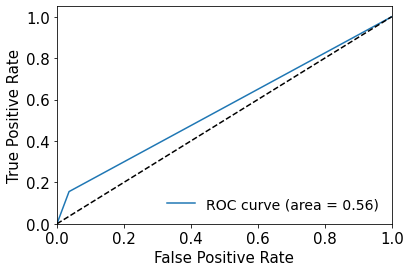

In [311]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

## TEST

#### Decision tree

In [261]:
df_test = dfc1[['Attrition','NumCompaniesWorked',
  'OverTime',
  'MaritalStatus_Single',
  'JobLevel',
  'JobRole_Laboratory Technician']].copy()
attributes = [col for col in dfdt.columns if col != 'Attrition']
X = df_test[attributes].values
y = df_test['Attrition']

In [209]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=3, min_samples_leaf=13)
clf = clf.fit(X_train, y_train)

In [206]:
y_pred = clf.predict(X_validation)
y_pred_tr = clf.predict(X_train)

In [207]:
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_validation, y_pred))

train acc. :  0.8663426488456865
test acc. :  0.8526912181303116


In [210]:
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8631 (+/- 0.05)
F1-score: 0.6546 (+/- 0.14)


predicting on test dataset

In [262]:
y_pred = clf.predict(X)

In [271]:
print('test acc. : ',accuracy_score(y, y_pred))

test acc. :  0.8333333333333334


In [276]:
print('Test F1-score %s' % f1_score(y, y_pred))
print(classification_report(y, y_pred))
confusion_matrix(y, y_pred)

Test F1-score 0.30985915492957744
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       249
           1       0.42      0.24      0.31        45

    accuracy                           0.83       294
   macro avg       0.65      0.59      0.61       294
weighted avg       0.80      0.83      0.81       294



array([[234,  15],
       [ 34,  11]])

In [267]:
len(y)

294

#### KNN

In [307]:
dfnn = df[['Attrition','EnvironmentSatisfaction', 'JobLevel', 'OverTime', 'StockOptionLevel', 'WorkLifeBalance']].copy()
attributes = [col for col in dfnn.columns if col != 'Attrition']
X = dfnn[attributes].values
y = dfnn['Attrition']

In [308]:
y_pred = clf.predict(X)

In [309]:
print('test acc. : ',accuracy_score(y, y_pred))
print('Test F1-score %s' % f1_score(y, y_pred))
print(classification_report(y, y_pred))
confusion_matrix(y, y_pred)

test acc. :  0.8401360544217688
Test F1-score 0.2295081967213115
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       249
           1       0.44      0.16      0.23        45

    accuracy                           0.84       294
   macro avg       0.65      0.56      0.57       294
weighted avg       0.80      0.84      0.81       294



array([[240,   9],
       [ 38,   7]])

In [ ]:
clf = KNeighborsClassifier(n_neighbors=4)

scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))